# Vectorizing Raw Data: TF-IDF

### TF-IDF

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

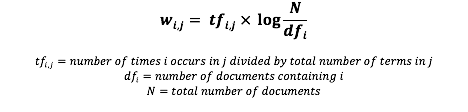

### Read in text

In [1]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("winemag-data-130k-v2.csv")


### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [3]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply TfidfVectorizer

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['description'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(129971, 32521)
['', '01', '02', '03', '04', '05', '053', '06', '07', '08', '081199', '09', '0degre', '1', '10', '100', '1000', '10000', '100000', '100000case', '100000plu', '1000acr', '1000eimerberg', '1000footelev', '1000liter', '100acr', '100case', '100gl', '100ml', '100organ', '100percent', '100plusyearold', '100point', '100th', '100variet', '100year', '100yearold', '100yearsold', '101', '1015', '1016', '102yearold', '1030feet', '103year', '104', '105', '105gl', '106', '10600', '106yearold', '107', '107th', '108', '10acr', '10gl', '10mile', '10plu', '10spot', '10th', '10year', '10yearold', '10yearsold', '11', '110', '1100', '11000', '110000', '1100feet', '110414', '110acr', '111', '111000', '1110feet', '111acr', '112', '114', '115', '1150', '115000', '116', '11600', '116acr', '117', '119', '1194', '11acr', '11th', '11vineyard', '11year', '11yearold', '12', '120', '1200', '12000', '1200feet', '1200foot', '1200liter', '120plu', '120yearold', '120yearsold', '12100', '122', '122acr', '

### Apply TfidfVectorizer to smaller sample

In [6]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['description'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 293)
['15', '150', '2012', '2016', 'abound', 'abrupt', 'accent', 'access', 'acid', 'across', 'aftertast', 'almost', 'alongsid', 'alreadi', 'although', 'appar', 'appeal', 'appl', 'approach', 'aroma', 'astring', 'attract', 'back', 'backbon', 'bake', 'balanc', 'balsam', 'bare', 'bean', 'becom', 'berri', 'better', 'bit', 'black', 'blackberri', 'blackcherri', 'blend', 'blossom', 'bodi', 'bolt', 'bottl', 'box', 'brace', 'bright', 'brimston', 'brisk', 'broom', 'build', 'buttercream', 'cabernet', 'california', 'candi', 'carri', 'case', 'certainli', 'chalki', 'char', 'charact', 'characterist', 'cheesi', 'cherri', 'chocol', 'cigar', 'citru', 'classic', 'clove', 'coconut', 'coffe', 'come', 'compact', 'companion', 'complement', 'complet', 'countri', 'crisp', 'crush', 'cut', 'dark', 'darkberri', 'depth', 'desicc', 'direct', 'distinct', 'domin', 'dri', 'drink', 'drinkabl', 'driven', 'earthi', 'easi', 'eleg', 'end', 'enjoy', 'entri', 'envelop', 'espresso', 'everyday', 'explos', 'express', 'extra

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [7]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
X_tfidf_df

,15,150,2012,2016,abound,abrupt,accent,access,acid,across,...,wide,wine,winemak,wineri,winter,wood,woodspic,year,yet,zesti
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.139058,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.245997,0.000000,0.000000,0.000000,0.000000,0.135595,0.000000,...,0.000000,0.127861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155191,0.000000,...,0.000000,0.146339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.209214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209214,...,0.000000,0.108743,0.000000,0.000000,0.209214,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120404,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151822,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202302,0.000000,...,0.000000,0.190764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222923,0.000000,0.000000,0.000000,...,0.000000,0.146082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.177449,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
